# Live Coding Exercise

## Working with API's in Python

### Created: 02/08/22 by Tom Lever

### Updated: 02/08/22 by Tom Lever

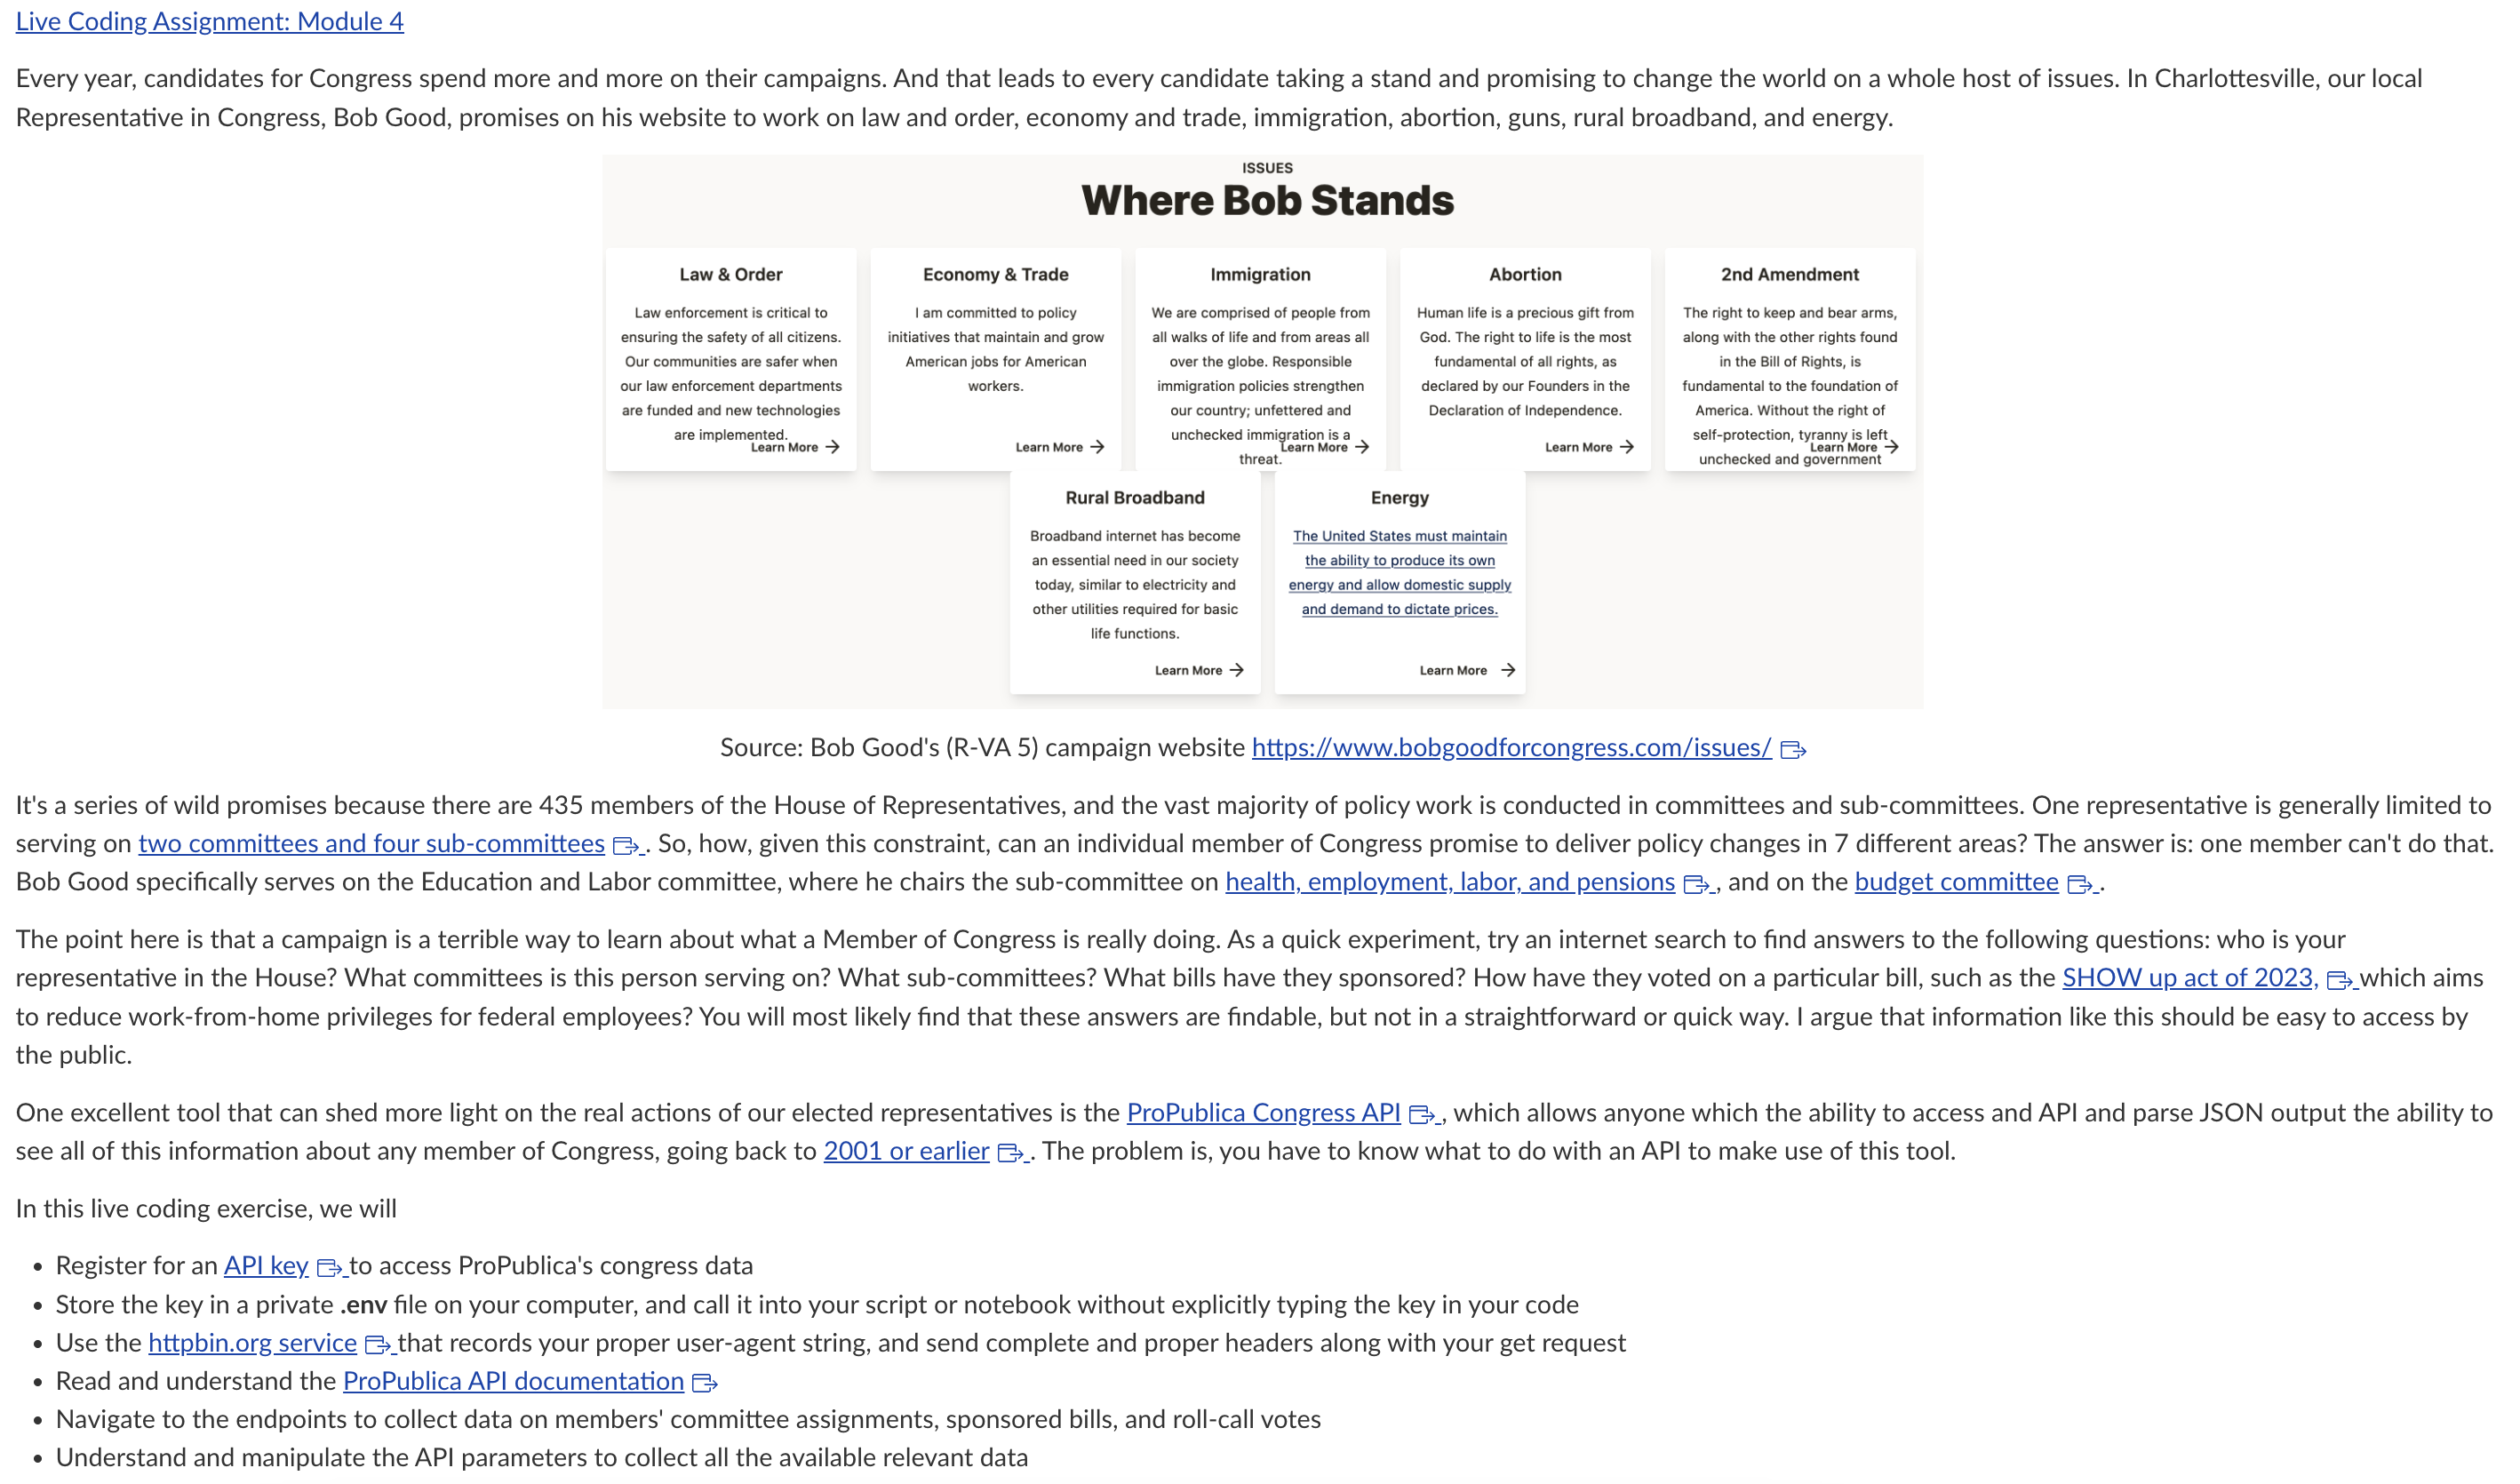

In [2]:
from IPython.display import Image
Image(filename="Prompt_For_Live_Coding_Exercise.PNG")

In [1]:
!pip install python-dotenv

In [2]:
import numpy as np
import pandas as pd
import dotenv
import requests
import json
import os

In [3]:
dotenv.load_dotenv()

True

In [4]:
dotenv.find_dotenv()

'/Users/tlever/Desktop/.env'

In [5]:
Pro_Publica_key = os.getenv('propublicakey')

In [6]:
print(Pro_Publica_key)

xSavlM2odzYryx6TZQckgBzXepNXYJ6jRweMlwFy


In [13]:
root = 'https://api.propublica.org/congress/v1'
endpoint = '/bills/search.json'
parameters = {
    'query': 'remote work',
    'sort': '_score',
    'dir': 'desc'
}
headers = {
    'X-API-KEY': Pro_Publica_key
}

In [14]:
response = requests.get(root + endpoint, params = parameters, headers = headers)
response

<Response [200]>

In [20]:
response_body_as_JSON = json.loads(response.text)
bills_data_frame = pd.json_normalize(response_body, record_path = ['results', 'bills'])
bills_data_frame.head()

,bill_id,bill_slug,bill_type,number,bill_uri,title,short_title,sponsor_title,sponsor_id,sponsor_name,...,committees,committee_codes,subcommittee_codes,primary_subject,summary,summary_short,latest_major_action_date,latest_major_action,cosponsors_by_party.D,cosponsors_by_party.R
0,s4436-116,s4436,s,S.4436,https://api.propublica.org/congress/v1/116/bil...,A bill to provide a tax credit for employers t...,AT HOME Act,Sen.,Y000064,Todd Young,...,Senate Finance Committee,[SSFI],[],Taxation,Assisting Teachers and Home Office Modernizati...,Assisting Teachers and Home Office Modernizati...,2020-08-04,Read twice and referred to the Committee on Fi...,1.0,NaN
1,hr7835-117,hr7835,hr,H.R.7835,https://api.propublica.org/congress/v1/117/bil...,To require Executive agencies to submit to Con...,SHOW UP Act of 2022,,H001084,Yvette Herrell,...,,[HSGO],[],,Stopping Home Office Work's Unproductive Probl...,Stopping Home Office Work&#39;s Unproductive P...,2022-05-19,Referred to the House Committee on Oversight a...,NaN,11.0
2,hr139-118,hr139,hr,H.R.139,https://api.propublica.org/congress/v1/118/bil...,To require Executive agencies to submit to Con...,SHOW UP Act of 2023,Rep.,C001108,James Comer,...,,"[SSGA, HSGO]",[],,,,2023-02-02,Received in the Senate and Read twice and refe...,NaN,26.0
3,hres191-117,hres191,hres,H.RES.191,https://api.propublica.org/congress/v1/117/bil...,To amend H. Res. 8 to eliminate remote voting ...,To amend H. Res. 8 to eliminate remote voting ...,,G000579,Mike Gallagher,...,,[HSRU],[],,This resolution repeals the authority for Memb...,This resolution repeals the authority for Memb...,2021-03-08,Referred to the House Committee on Rules.,NaN,6.0
4,hres75-118,hres75,hres,H.RES.75,https://api.propublica.org/congress/v1/118/bil...,Providing for consideration of the joint resol...,Providing for consideration of the joint resol...,Rep.,B001248,Michael C. Burgess,...,,[HSRU],[],,,,2023-01-31,Motion to reconsider laid on the table Agreed ...,NaN,NaN


# Members Endpoint

In [21]:
congress = '117'
chamber = 'house'
endpoint = f'/{congress}/{chamber}/members.json'
endpoint

'/117/house/members.json'

In [22]:
parameters = {
    
}
headers = {
    'X-API-Key': Pro_Publica_key
}

In [26]:
response = requests.get(root + endpoint, params = parameters, headers = headers)
response

<Response [200]>

In [30]:
response_body_as_JSON = json.loads(response.text)
members_data_frame = pd.json_normalize(response_body_as_JSON, record_path = ['results', 'members'])
members_data_frame.head()

,id,title,short_title,api_uri,first_name,middle_name,last_name,suffix,date_of_birth,gender,...,office,phone,fax,state,district,at_large,geoid,missed_votes_pct,votes_with_party_pct,votes_against_party_pct
0,A000370,Representative,Rep.,https://api.propublica.org/congress/v1/members...,Alma,None,Adams,None,1946-05-27,F,...,2436 Rayburn House Office Building,202-225-1510,None,NC,12,False,3712,0.50,99.09,0.81
1,A000055,Representative,Rep.,https://api.propublica.org/congress/v1/members...,Robert,B.,Aderholt,None,1965-07-22,M,...,266 Cannon House Office Building,202-225-4876,None,AL,4,False,0104,1.40,96.31,3.59
2,A000371,Representative,Rep.,https://api.propublica.org/congress/v1/members...,Pete,None,Aguilar,None,1979-06-19,M,...,109 Cannon House Office Building,202-225-3201,None,CA,31,False,0631,0.30,98.89,1.01
3,A000372,Representative,Rep.,https://api.propublica.org/congress/v1/members...,Rick,None,Allen,None,1951-11-07,M,...,570 Cannon House Office Building,202-225-2823,None,GA,12,False,1312,2.91,90.54,9.36
4,A000376,Representative,Rep.,https://api.propublica.org/congress/v1/members...,Colin,None,Allred,None,1983-04-15,M,...,114 Cannon House Office Building,202-225-2231,None,TX,32,False,4832,1.00,98.27,1.62
